# Tarea 15

hecho por Jesús Omar Cuenca Espino A01378844

### Link a la playlist de youtube

https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL

## Video 10 del tutorial para Keras por DeepLizard

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import itertools
import os
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

In [2]:
os.chdir("data/dogs-vs-cats")
if os.path.isdir("train/dog") is False:
    
    ## Create the directories that the images will be moved to
    os.makedirs("train/dog")
    os.makedirs("valid/dog")
    os.makedirs("test/dog")
    os.makedirs("train/cat")
    os.makedirs("valid/cat")
    os.makedirs("test/cat")
    
    ## Move random images to their respective folders
    for img in random.sample(glob.glob("cat*"), 500):
        shutil.move(img, "train/cat")
    for img in random.sample(glob.glob("dog*"), 500):
        shutil.move(img, "train/dog")
    for img in random.sample(glob.glob("cat*"), 100):
        shutil.move(img, "valid/cat")
    for img in random.sample(glob.glob("dog*"), 100):
        shutil.move(img, "valid/dog")
    for img in random.sample(glob.glob("cat*"), 50):
        shutil.move(img, "test/cat")
    for img in random.sample(glob.glob("dog*"), 50):
        shutil.move(img, "test/dog")
os.chdir("../../")

In [3]:
train_path = "data/dogs-vs-cats/train"
valid_path = "data/dogs-vs-cats/valid"
test_path = "data/dogs-vs-cats/test"

In [4]:
train_batches = \
 ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)
valid_batches = \
 ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10)
test_batches = \
 ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=["cat", "dog"], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [5]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100

In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

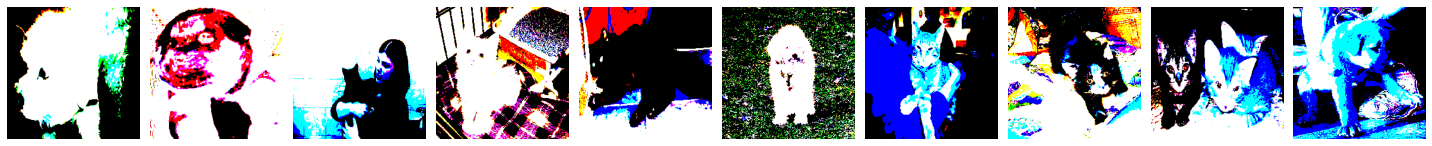

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

## Video 11 del tutorial para Keras por DeepLizard

Video para actualizar el curso aparentmente

porque Tensorflow cambia de versiones y que tenemos que usar parametros extra para las funciones de fit y predict para que funcionen bien

## Video 12 del tutorial para Keras por DeepLizard

In [9]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense (Dense)                (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
__________________________________________________

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

### Training the NN

In [12]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Epoch 1/10
100/100 - 35s - loss: 11.8293 - accuracy: 0.5720 - val_loss: 5.2964 - val_accuracy: 0.5750
Epoch 2/10
100/100 - 33s - loss: 2.9194 - accuracy: 0.7660 - val_loss: 4.4837 - val_accuracy: 0.5900
Epoch 3/10
100/100 - 33s - loss: 0.4328 - accuracy: 0.9060 - val_loss: 3.5105 - val_accuracy: 0.5700
Epoch 4/10
100/100 - 34s - loss: 0.4535 - accuracy: 0.9090 - val_loss: 2.8205 - val_accuracy: 0.5750
Epoch 5/10
100/100 - 34s - loss: 0.0492 - accuracy: 0.9850 - val_loss: 2.6177 - val_accuracy: 0.6200
Epoch 6/10
100/100 - 34s - loss: 0.0096 - accuracy: 0.9980 - val_loss: 2.6323 - val_accuracy: 0.6100
Epoch 7/10
100/100 - 33s - loss: 0.0038 - accuracy: 0.9990 - val_loss: 2.5800 - val_accuracy: 0.6000
Epoch 8/10
100/100 - 34s - loss: 5.5928e-04 - accuracy: 1.0000 - val_loss: 2.5725 - val_accuracy: 0.6100
Epoch 9/10
100/100 - 34s - loss: 3.4191e-04 - accuracy: 1.0000 - val_loss: 2.5783 - val_accuracy: 0.6050
Epoch 10/10
100/100 - 34s - loss: 2.6917e-04 - accuracy: 1.0000 - val_loss: 2.5781

## Video 13 del tutorial para Keras por DeepLizard

### Using the NN

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

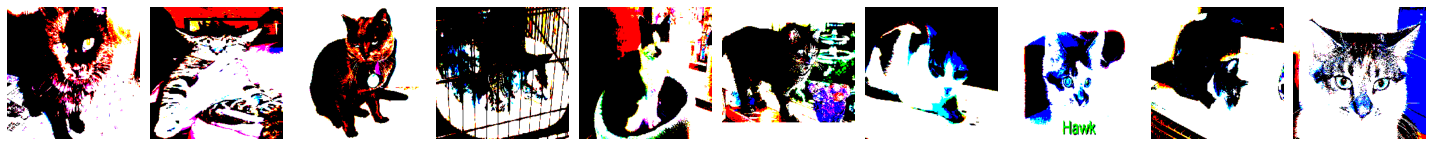

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [13]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [14]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
np.round(predictions)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [17]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

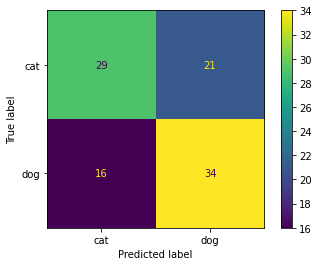

In [18]:
cm_plot_labels = ["cat","dog"]
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()

## Video 14 del tutorial para Keras por DeepLizard

In [20]:
# This is the automated way to download the VGG16 model, but for some reason
# it is not working for something related to an SSL issue.
# So a hack around this issue is to explicetly create an SSL context like so
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Solution found in >> https://github.com/fchollet/deep-learning-models/issues/33#issuecomment-397257502

vgg16_model = tf.keras.applications.VGG16()

553467904/553467096 [==============================] - 23s 0us/step


In [21]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

Converting the original VGG16 model into a sequential model

In [22]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [24]:
# Block the model layers to be not trainable
for layer in model.layers:
    layer.trainable = False

In [25]:
# Add the last layer to predict
model.add(Dense(units=2, activation="softmax"))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Video 15 del tutorial para Keras por DeepLizard

### Train the fine tuned VGG16 model

In [27]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

Una vez compilado el model de VGG16 modificado lo mandamos a entrenar para ver que tan buenos resultados nos entrega

In [28]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Epoch 1/5
100/100 - 240s - loss: 0.3257 - accuracy: 0.8500 - val_loss: 0.1388 - val_accuracy: 0.9350
Epoch 2/5
100/100 - 246s - loss: 0.0897 - accuracy: 0.9670 - val_loss: 0.0914 - val_accuracy: 0.9600
Epoch 3/5
100/100 - 242s - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0694 - val_accuracy: 0.9650
Epoch 4/5
100/100 - 232s - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.0588 - val_accuracy: 0.9650
Epoch 5/5
100/100 - 232s - loss: 0.0313 - accuracy: 0.9950 - val_loss: 0.0545 - val_accuracy: 0.9700


Los resultados son buenos porque el modelo VGG16 ya habia sido previamente entrenado con un data set de ImageNet

## Video 16 del tutorial para Keras por DeepLizard

### Predict using the fine-tuned VGG16 model

In [29]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [30]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [31]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [32]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

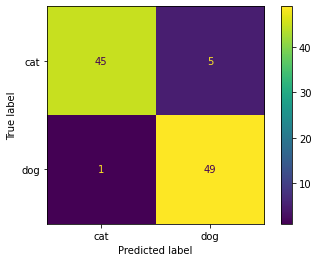

In [33]:
cm_plot_labels = ["cat","dog"]
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()

## Video 17 del tutorial para Keras por DeepLizard

## Mobile Net

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

Descarga del modelo MobileNet desde la web

In [35]:
mobile = tf.keras.applications.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [38]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

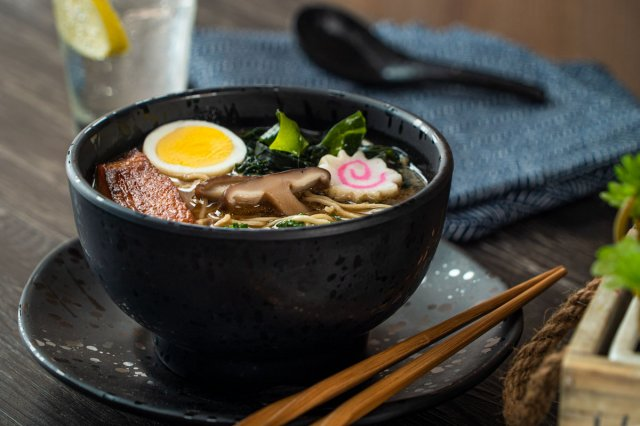

In [39]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/1.PNG", width=300, height=200)

In [41]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

40960/35363 [==================================] - 0s 0us/step


[[('n03259280', 'Dutch_oven', 0.34843835),
  ('n07590611', 'hot_pot', 0.3204902),
  ('n04330267', 'stove', 0.061687768),
  ('n03633091', 'ladle', 0.04862409),
  ('n04596742', 'wok', 0.045784827)]]

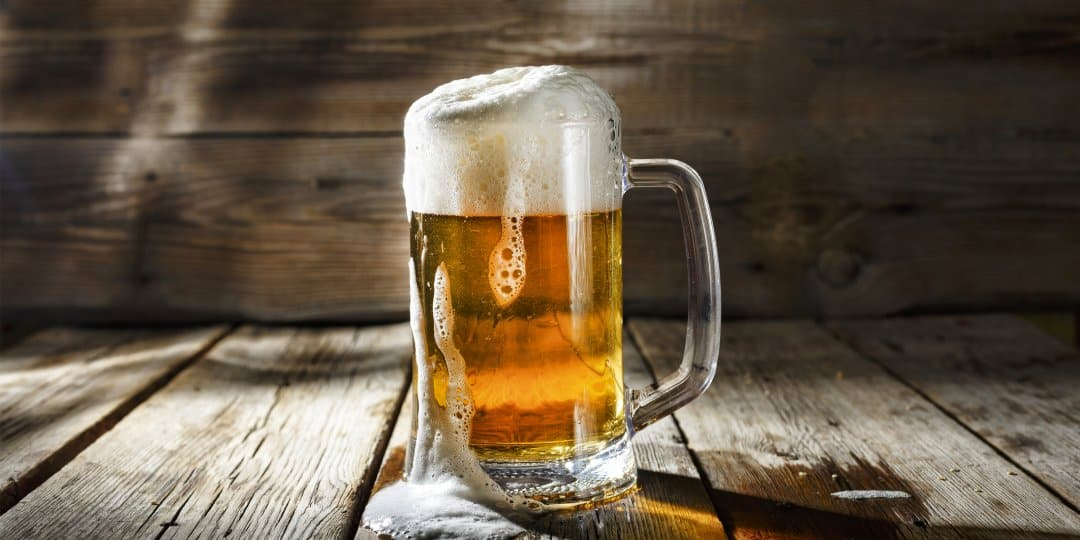

In [42]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/2.PNG", width=300, height=200)

In [43]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02823750', 'beer_glass', 0.9799692),
  ('n03937543', 'pill_bottle', 0.006728097),
  ('n02823428', 'beer_bottle', 0.0062104966),
  ('n04557648', 'water_bottle', 0.0017349011),
  ('n04591713', 'wine_bottle', 0.0014205459)]]

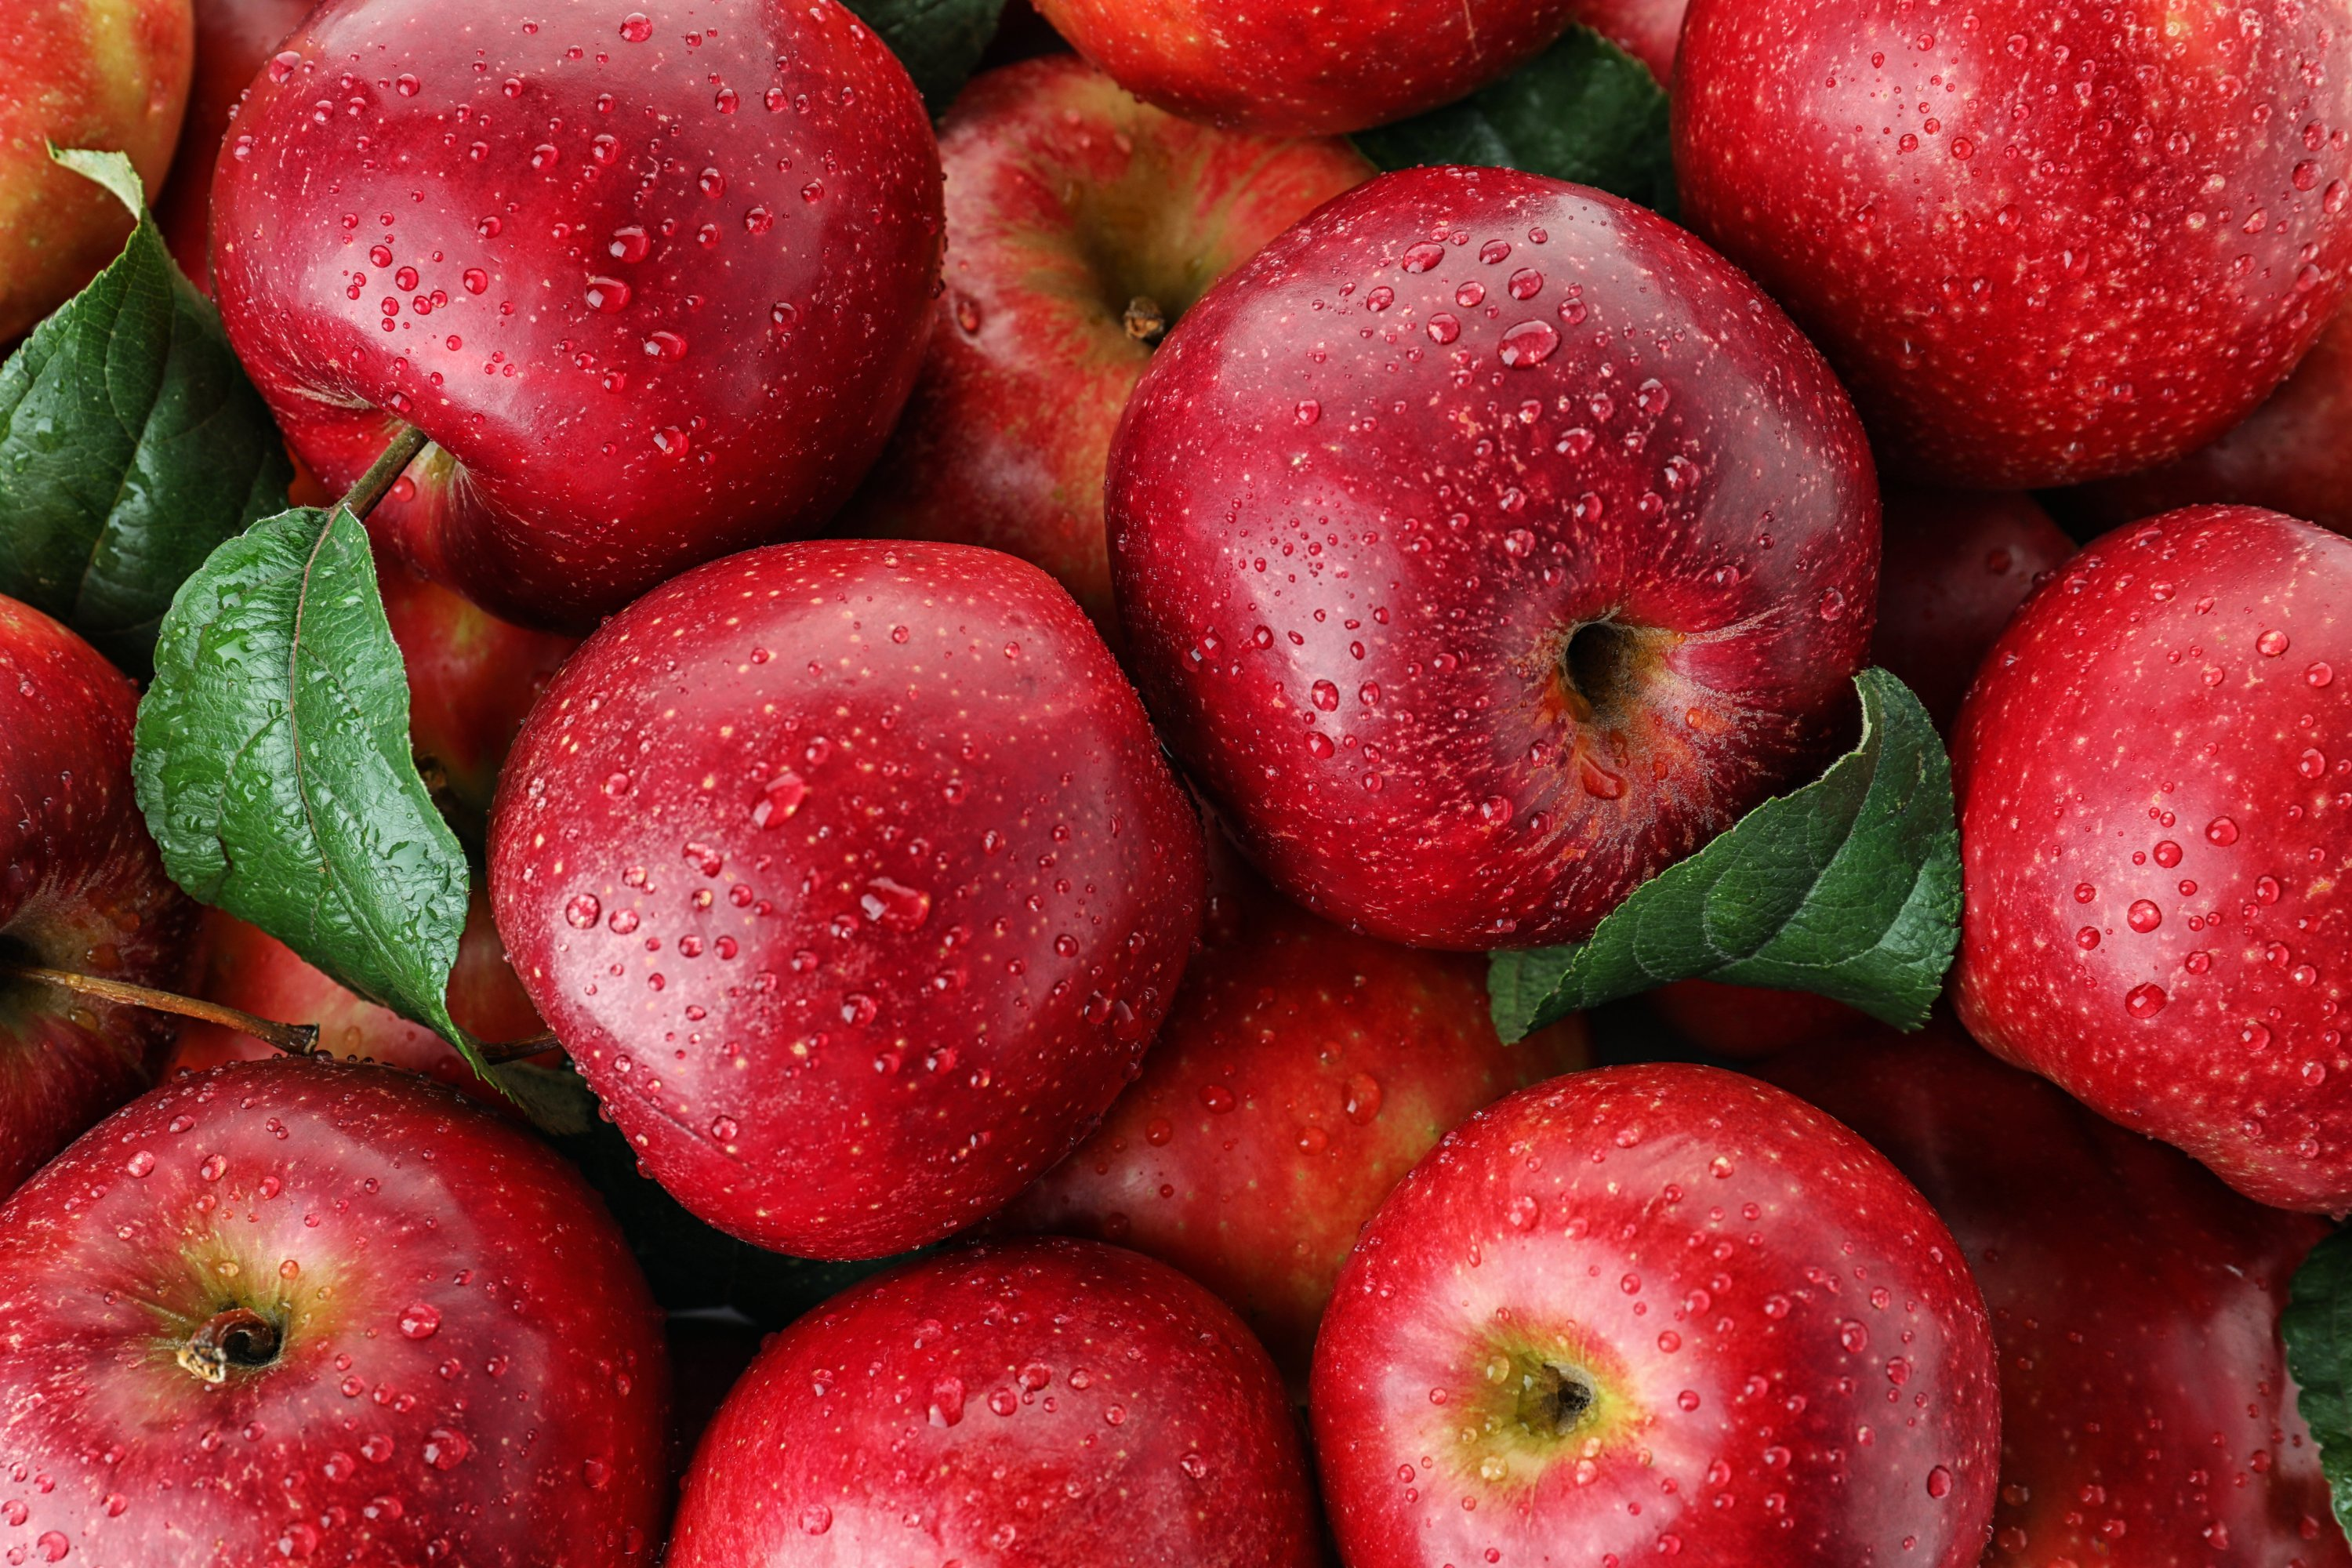

In [47]:
from IPython.display import Image
Image(filename="data/MobileNet-samples/3.PNG", width=300, height=200)

In [48]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07742313', 'Granny_Smith', 0.6022655),
  ('n03461385', 'grocery_store', 0.071134456),
  ('n07753113', 'fig', 0.067756936),
  ('n07745940', 'strawberry', 0.030230124),
  ('n03089624', 'confectionery', 0.029724887)]]

## Video 18 del tutorial para Keras por DeepLizard

Tuning of the model to fit sign language

In [50]:
# Organize data into train, valid, test dirs
os.chdir('data/Sign_language')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')
os.chdir('../..')

In [51]:
train_path = "data/Sign_language/train"
valid_path = "data/Sign_language/valid"
test_path = "data/Sign_language/test"

In [55]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)\
.flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


## Video 19 del tutorial para Keras por DeepLizard

### Modify the Model

In [56]:
mobile = tf.keras.applications.MobileNet()

In [57]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [58]:
x = mobile.layers[-6].output
# Se activa como una funcion la capa Dense porque es un modelo funcional
output = Dense(units=10, activation="softmax")(x)

In [59]:
model = Model(inputs=mobile.input, outputs=output)

Bloqueamos algunas capas para que no puedan ser entrenadas

In [60]:
for layer in model.layers[:-23]:
    layer.trainable = False

In [61]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

### Training the model

In [62]:
model.compile(optimizer=Adam(lr=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

In [64]:
model.fit(
    x=train_batches,
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10, ## Aunque en el tutorial usan 30 epochs, lo voy a dejar en 10 para no matar mi CPU
    verbose=2
)

Epoch 1/10
172/172 - 54s - loss: 0.6450 - accuracy: 0.8125 - val_loss: 0.2260 - val_accuracy: 0.9500
Epoch 2/10
172/172 - 52s - loss: 0.1215 - accuracy: 0.9825 - val_loss: 0.0834 - val_accuracy: 0.9900
Epoch 3/10
172/172 - 53s - loss: 0.0644 - accuracy: 0.9930 - val_loss: 0.0457 - val_accuracy: 0.9900
Epoch 4/10
172/172 - 52s - loss: 0.0337 - accuracy: 0.9971 - val_loss: 0.0397 - val_accuracy: 0.9900
Epoch 5/10
172/172 - 54s - loss: 0.0319 - accuracy: 0.9977 - val_loss: 0.0417 - val_accuracy: 0.9933
Epoch 6/10
172/172 - 49s - loss: 0.0180 - accuracy: 0.9994 - val_loss: 0.0288 - val_accuracy: 0.9933
Epoch 7/10
172/172 - 53s - loss: 0.0143 - accuracy: 0.9994 - val_loss: 0.0296 - val_accuracy: 0.9933
Epoch 8/10
172/172 - 57s - loss: 0.0165 - accuracy: 0.9982 - val_loss: 0.0306 - val_accuracy: 0.9933
Epoch 9/10
172/172 - 54s - loss: 0.0104 - accuracy: 0.9994 - val_loss: 0.0263 - val_accuracy: 0.9933
Epoch 10/10
172/172 - 53s - loss: 0.0109 - accuracy: 0.9994 - val_loss: 0.0244 - val_accura

### Predicting using the new model

In [65]:
test_labels = test_batches.classes

In [66]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [67]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [68]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

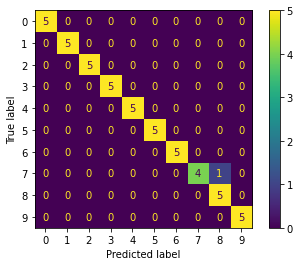

In [69]:
cm_plot_labels = test_batches.class_indices.keys()
result = ConfusionMatrixDisplay(cm, display_labels=cm_plot_labels)
result.plot()

## Video 20 del tutorial para Keras por DeepLizard

### Data augmentation

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [71]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [72]:
gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.1,
    channel_shift_range=10,
    horizontal_flip=True
)

In [76]:
chosen_image = random.choice(os.listdir("data/dogs-vs-cats/train/dog"))

In [80]:
image_path = "data/dogs-vs-cats/train/dog/" + chosen_image
image_path

'data/dogs-vs-cats/train/dog/dog.4449.jpg'

In [81]:
assert os.path.isfile(image_path)

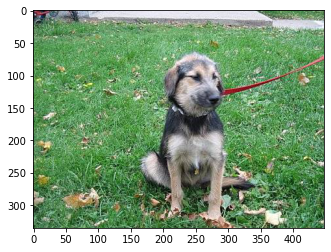

In [82]:
# Dibujamos la imagen
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [83]:
# Generate batches of augmented images
aug_iter = gen.flow(image)

In [84]:
# Get 10 samples from the generator
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

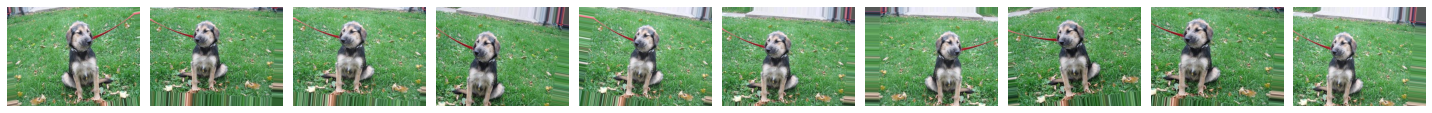

In [85]:
plotImages(aug_images)

## Video 21 del tutorial para Keras por DeepLizard

Resuelven dudas sobre algunos de los atributos y donde estan las etiquetas generadas por keras

## Video 22 del tutorial para Keras por DeepLizard

Habla sobre como reproducir los mismos resultados de un modelo. Quitandole la aleatoridad de modo que sin importar cuando se entrene el modelo, este entregue los mismos resultados

## Video 23 del tutorial para Keras por DeepLizard

Acceso al bias usando Keras

## Video 24 del tutorial para Keras por DeepLizard

Calculo del numero de parametros aprendibles de un modelo

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
model = Sequential([
        Dense(3, input_shape=(2,), activation='relu'),
        Dense(5, activation='relu'),
        Dense(7, activation='relu'),
        Dense(2, activation='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 20        
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 16        
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.get_weights()

[array([[ 0.4875629 , -0.5190315 , -0.22946191],
        [-0.2838784 ,  0.10789454, -0.81573015]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.81893986,  0.15920931,  0.5199695 , -0.8051832 ,  0.24492139],
        [-0.00205261, -0.66536343,  0.4095822 ,  0.8286843 ,  0.46780187],
        [-0.4392834 ,  0.40503186,  0.3781163 , -0.2837512 ,  0.6301169 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.30806404,  0.7237797 ],
        [-0.777412  , -0.27630305],
        [-0.8610207 , -0.7250297 ],
        [ 0.27857423, -0.78354377],
        [-0.7763419 ,  0.6201035 ]], dtype=float32),
 array([0., 0.], dtype=float32)]

## Video 25 del tutorial para Keras por DeepLizard

Habla sobre como las capas de max-pooling reducen drasticamente el numero de parametros que se pueden aprender, simplificando el modelo.

Y de como las capas de conv2d_2 aumentan exponencialmente el numero de parametros a aprender de un modelo, porque son matrices.